In [1]:
#--- Transform, clean data ---#
import pandas as pd
import numpy as np

#--- Manage Missing values ---#
import missingno as msno

from scipy import stats

#--- converting to time
import datetime

#--- Data visualisation ---#
import matplotlib.pyplot as plt
import seaborn as sns

#--- Data pre processing ---#
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#--- Machine learning model : Linear regression ---#
from sklearn.linear_model import LinearRegression

#--- Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### Importation du dataset

In [2]:
car_data = pd.read_csv('./data/carData.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Analyse exploratoire
### Analyse de forme
- Le dataset comprend 301 observations et 9 variables
- Le dataset est composé de 5 variables quantitatives et 4 variables qualitatives
- Il n'y a pas de valeurs manquantes dans le dataset

In [3]:
car_data.shape

(301, 9)

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [6]:
car_data.dtypes.value_counts()

object     4
int64      3
float64    2
dtype: int64

In [7]:
car_data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### Statistique du dataset

In [8]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


####  .Distribution des données avec matplotlib : histogrammes sur les variables

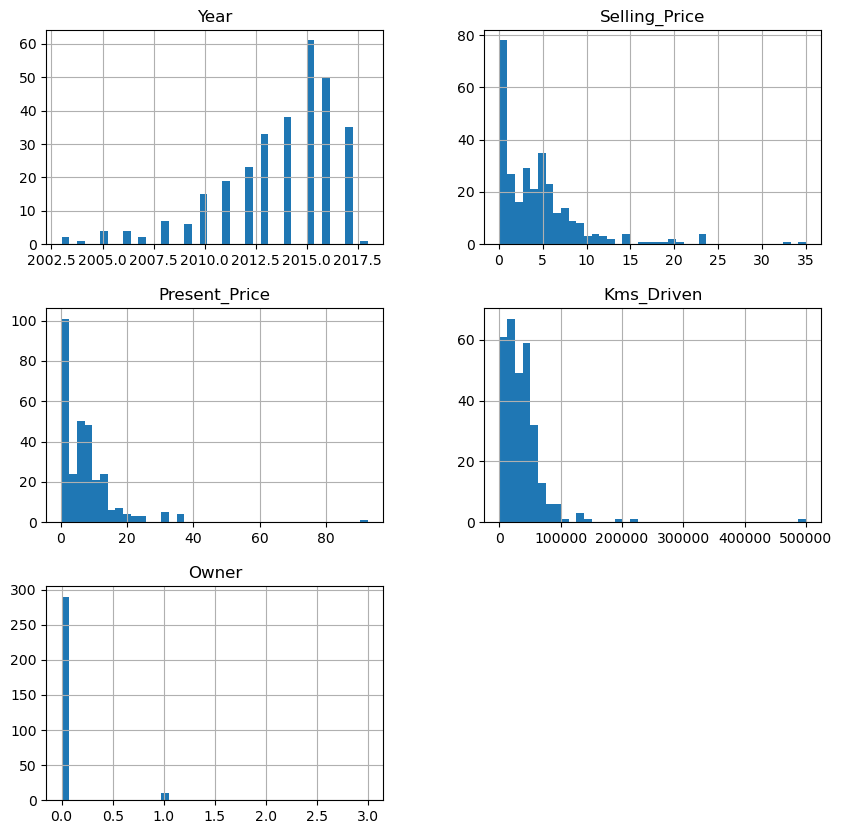

In [9]:
car_data.hist(bins=40, figsize=(10,10))
plt.savefig("./plots/cardata1_distribution.png")
plt.show()

#### - Les variables ne suivent pas une distribution normale.

#### . Tracé catplot


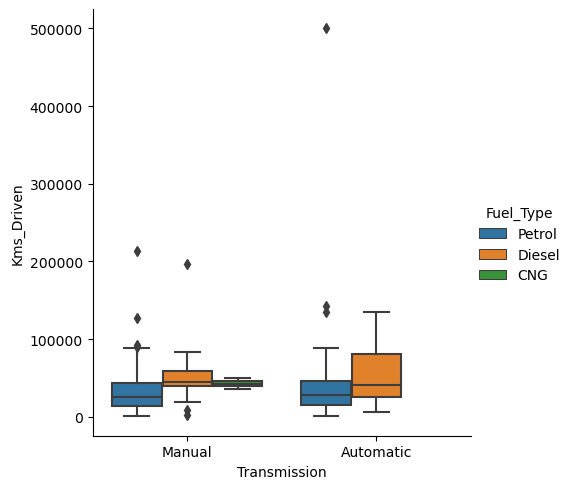

In [10]:
sns.catplot(data=car_data,x="Transmission", y="Kms_Driven",hue= "Fuel_Type", kind="box")
plt.show()

In [11]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### . Boxplot selling price

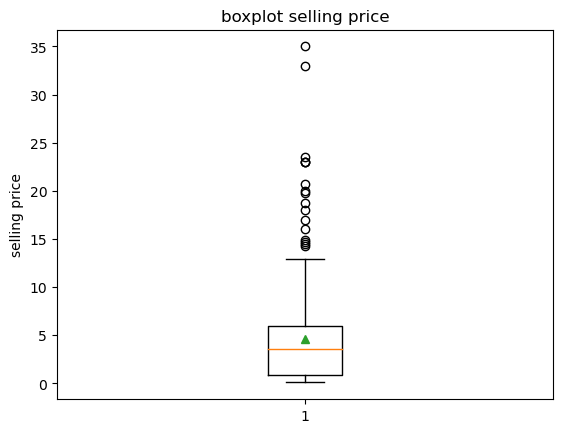

In [12]:
plt.boxplot(car_data["Selling_Price"],showmeans=True)
plt.title('boxplot selling price')
plt.ylabel('selling price')
plt.show()

#### Le boxplot indique qu'il y a des valeurs aberrantes. On doit les traiter

#### . Corrélation entre les variables Year et Selling price


In [13]:
car_data[['Year','Selling_Price']].corr()

,Year,Selling_Price
Year,1.000000,0.236141
Selling_Price,0.236141,1.000000


#### - Les deux variables sont positivement corréllées mais la corrélation n'est pas forte ( coef de correl de 0.23 )

#### . Corrélation des variables du dataset

In [14]:
car_data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


#### . Visualisation de la corrélation avec heatmap

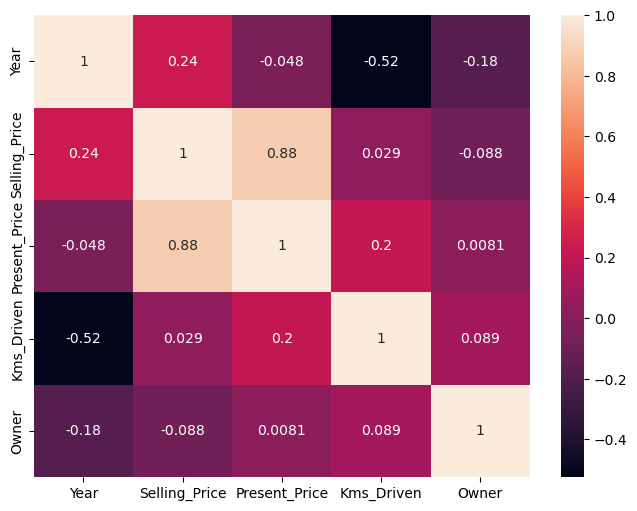

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(car_data.corr(), annot= True)
plt.savefig("./plots/data1_correlation.png")
plt.show()

- Les valeurs plus proche de 1 montrent une forte corrélation, les valeurs proche de 0 montrent une faible corrélation
- il y a des corrélations positive et négative entre les différentes variables.
- La plus grande corrélation repose entre le "selling price" et le "present price", puis le "selling price" et le "year"

#### . Veille sur la régression linéaire

####  la régression linéaire est un modèle statistique spécialisé dans la mise en œuvre des fonctions prédictives avec un minimum d'erreurs. On distingue le plus souvent deux types d'algorithmes de régression linéaire : la régression linéaire simple et la régression linéaire multiple. Cet algorithme réalise des prédictions pour des variables continues ou réelles comme le salaire, les ventes, le prix des produits, l'évolution en poids ou en taille…

### Preprocessing

In [16]:
#car_data['Owner'].unique()

In [17]:
car_data[car_data['Owner'] == 3]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3


In [18]:
car_data= car_data.drop(85)

In [19]:
car_data.reset_index(drop= True)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
295,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
296,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
297,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
298,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


#### - Supression des outliers de la variables selling price

In [20]:
q25 = np.percentile(car_data['Selling_Price'], 25)
q75 = np.percentile(car_data['Selling_Price'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower= q25 - cut_off
upper = q75 + cut_off
car_data.loc[car_data['Selling_Price']< lower] =np.nan
car_data.loc[car_data['Selling_Price']> upper] = np.nan
#car_data.isnull().sum()
car_data1 = car_data.dropna(axis=0)
#car_data1.shape

#### - Calcul de l'age des voitures à partir de la colonne Year

In [22]:
new_car_data = car_data1.copy()
current_year = datetime.datetime.now().year 
new_car_data['Current_year'] = current_year
new_car_data['Age']= new_car_data['Current_year'] - new_car_data['Year']
new_car_data.drop('Year', axis=1,inplace=True)
new_car_data.drop('Current_year', axis=1, inplace=True)
new_car_data.shape

(283, 9)

#### - Le dataset comprends maintenant 283 observations et 9 variables

#### 1.Régression linéaire univariée avec scipy , feature : age des voiture, target : selling price

In [23]:
X = new_car_data['Age'].values
y = new_car_data['Selling_Price'].values

#### - Division du dataset en dataset d'entrainement et dataset de validation

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state= 2)

In [26]:
slope, intercept, r, p, se = stats.linregress(X_train, y_train)
print('s:', slope)
print('intercept :', intercept)
print('r_value:' , r)
print('p_value :', p)
print('stderr :', se)

s: -0.3239207760711398
intercept : 6.86416656459502
r_value: -0.308444787008736
p_value : 9.824679356041558e-06
stderr : 0.07135500883539245


#### - Modèle 

In [27]:
def prediction(x):
    return slope * x + intercept

y_pred = prediction(X_test)

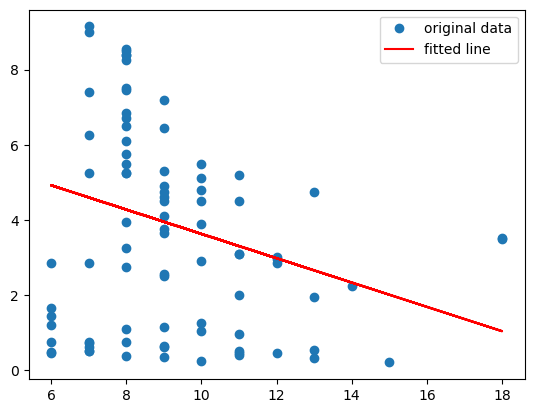

In [28]:
plt.plot(X_test, y_test, 'o', label='original data')
plt.plot(X_test, y_pred, 'r', label='fitted line')
plt.legend()
plt.show()

#### - Calcul des métriques

In [29]:
r2score = r2_score(y_test, y_pred)
r2score

0.004664960640506477

In [30]:
mae = mean_absolute_error(y_test,y_pred)
mae

2.2291095942063652

In [31]:
rmse = mean_squared_error(y_test,y_pred, squared= False)
rmse

2.610157463715952

####  2. Régression linéaire univariée avec numpy

In [32]:
X1 = new_car_data['Age'].values
y1= new_car_data['Selling_Price'].values

In [33]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.7, random_state= 2)

In [34]:
coef = np.polyfit(X_train1, y_train1, 1)
coef

array([-0.32392078,  6.86416656])

In [35]:
beta0, beta1 = coef[0], coef[1]

In [36]:
poly = np.poly1d(coef)
y_pred1 = poly(X_test1)

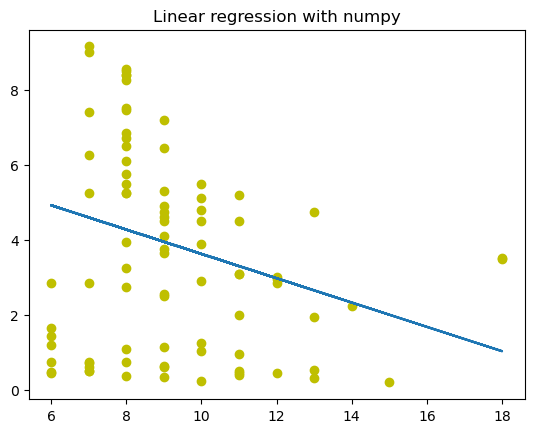

In [37]:
plt.plot(X_test1,y_test1, 'yo', X_test, y_pred1)
plt.title('Linear regression with numpy')
plt.show()

#### - Mètriques

In [38]:
r2score1 = r2_score(y_test1, y_pred1)
r2score1

0.004664960640506477

In [39]:
mae = mean_absolute_error(y_test1,y_pred1)
mae

2.2291095942063657

In [40]:
rmse = mean_squared_error(y_test1,y_pred1, squared= False)
rmse

2.610157463715952

#### Régression linéaire avec scikit-learn

In [41]:
X2 = new_car_data['Age'].values.reshape(-1,1)
y2= new_car_data['Selling_Price'].values.reshape(-1,1)

#### - Division du dataset en dataset d'entrainement et de validation

In [42]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.7, random_state= 2)

#### - Initialisation du modèle de règression linéaire

In [43]:
linear_regression=LinearRegression()

#### - Entrainement du modèle

In [44]:
linear_regression.fit(X_train2,y_train2)

LinearRegression()

#### - Prédiction

In [45]:
y_pred3= linear_regression.predict(X_test2)

In [46]:
print('Train score :',linear_regression.score(X_train2,y_train2))
print('Test score :',linear_regression.score(X_test2,y_test2))

Train score : 0.09513818663286455
Test score : 0.004664960640506477


#### - Le score de validation est inférieur au score d'entrainement : le modèle fait un under fitting

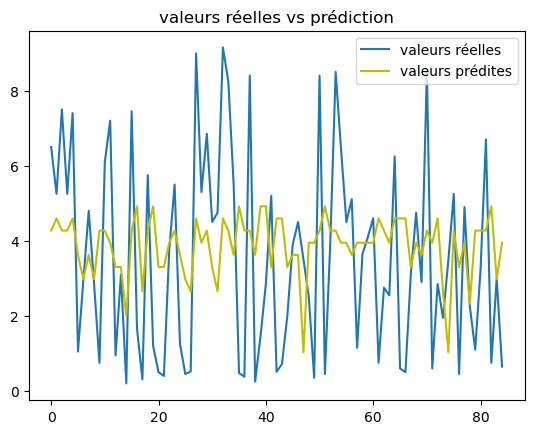

In [47]:
plt.plot(y_test2, label='valeurs réelles')
plt.plot(y_pred3,'y' ,label='valeurs prédites')
plt.legend()
plt.title('valeurs réelles vs prédiction')
plt.show()

#### - Calcul des métriques

In [48]:
r_score = r2_score(y_test2, y_pred3)
r_score 

0.004664960640506477

In [49]:
mae = mean_absolute_error(y_test,y_pred3)
mae

2.2291095942063652

In [50]:
rmse = mean_squared_error(y_test,y_pred3, squared= False)
rmse

2.610157463715952

- Suite à l'implémentation de la régression linéaire avec numpy, scipy et scikit-learn, on obtient le meme scrore R2 = 0.004
- qui est très faible et du coup le modèle n'est pas performant.
- Ce qui peut etre dù à la composition du dataset, mais aussi à l'exploitation d'une seule feature qui n'apporte
- pas beaucoup
- Par contre, Scikit-learn est plus simple d'utilisation vu que c'est spécialement conçue du machine learning

#### Amélioration du modèle avec ajout de features : régression linéaire multiple
- features : age, kms_Driven, Transmission

- La variable Transmission étant qualitative,elle doit etre encodée pour son utilisation

In [51]:
encoder = OneHotEncoder()
transmission_encode = encoder.fit_transform(new_car_data[["Transmission"]])
new_car_data[encoder.categories_[0]] = transmission_encode.toarray()

#encoder.categories_
new_car_data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Automatic,Manual
0,ritz,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0,9.0,0.0,1.0
1,sx4,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0,10.0,0.0,1.0
2,ciaz,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0,6.0,0.0,1.0
3,wagon r,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0,12.0,0.0,1.0
4,swift,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0,9.0,0.0,1.0


In [52]:
new_car_data.drop('Transmission', axis=1, inplace = True)

#### - Définition des features et du target

In [53]:
Xm=new_car_data[['Age','Kms_Driven','Automatic','Manual']]
ym=new_car_data['Selling_Price'].values

#### - Division du dataset en dataset d'entrainement et dataset de validation

In [54]:
X_trainm, X_testm, y_trainm, y_testm = train_test_split(Xm,ym, train_size=0.7, random_state= 2)

#### - Standardisation

In [55]:
scaler = StandardScaler()

In [56]:
scaler = StandardScaler()
X_trainm = scaler.fit_transform(X_trainm)
X_testm = scaler.fit_transform (X_testm)

In [57]:
linear_reg=LinearRegression()

In [58]:
linear_reg.fit(X_trainm,y_trainm)

LinearRegression()

In [59]:
y_predict=linear_reg.predict(X_testm)

In [60]:
print('Train score :',linear_reg.score(X_trainm,y_trainm))
print('Test score :', linear_reg.score(X_testm,y_testm))

Train score : 0.11539906693565094
Test score : 0.047142724607376785


#### - Métriques

In [61]:
rscore = r2_score(y_testm, y_predict)
rscore

0.047142724607376785

In [62]:
mae = mean_absolute_error(y_testm,y_predict)
mae

2.15598894967772

In [63]:
mse = mean_squared_error(y_testm,y_predict, squared= False)
mse

2.553853546541174

- La régression avec des features multiples donne un score faible quasi égal à celui de la régression univariée
- Ce qui semble étre incohérent car le modèle devrait etre plus performant à mon avis
- ça pourrait etre du à une erreur de calcul aussi quelque part

In [64]:
linear_reg.predict(pd.DataFrame([[7,
                                  100000,
                                  "1", "0"]],
                                  columns=["Age","Kms_Driven","Manual","Automatic"]))

C:\Users\sadio\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([48737.73108376])

#### Implémentation de la classe régression linéaire

In [65]:
class LinearRegression:
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def Fit(self, X, y):
        Cov =  np.mean(X *y) - (np.mean(X) * np.mean(y))
        varX = np.var(X)
        vary = np.var(y)
        self.b1= Cov/varX
        self.b0 = np.mean(y) - (b1*(np.mean(X))
    def Predict(self, X):
        return b0 + b1*X
                        
    def Gradien(self, X, y, b1):
        n = len(y)
        return 1/n * X.T.dot(predict(self,X) - y)
                                
    gradien = Gradien(self, X, y, b1)
                                
    def Des_gradien(self, X, y, b1, learning_rate, num_iterations):
        for i in range(0, num_iterations):
            self.b1=  self.b1 - learning_rate * gradien
            return b1

   


SyntaxError: invalid syntax (4145641305.py, line 14)

#### - Au final , l'implémentation de la régression linéaire univariée avec numpy,scipy et scikit-learn sont les memes sauf que sciki
-  sikit-learn est plus complète
- L'utilisation de certaines variables dites catégorielles nécessite de l'encodage
- La visualisation des données est très utile dans la mesure où elle donne un overview des données